In [1]:
from qiskit.aqua.algorithms import VQE, NumPyEigensolver
import matplotlib.pyplot as plt
import numpy as np
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock
#from qiskit.circuit.library import EfficientSU2
from qiskit.aqua.components.optimizers import COBYLA, SPSA, SLSQP
from qiskit.aqua.operators import Z2Symmetries
from qiskit import IBMQ, BasicAer, Aer
from qiskit.chemistry.drivers import PySCFDriver, UnitsType
from qiskit.chemistry import FermionicOperator
from qiskit import IBMQ
from qiskit.aqua import QuantumInstance
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel
maptype='parity'
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
def get_qubit_op(dist):
    driver = PySCFDriver(atom="Li .0 .0 .0; H .0 .0 " + str(dist), unit=UnitsType.ANGSTROM, 
                         charge=0, spin=0, basis='sto3g')
    molecule = driver.run()
    
    freeze_list = [0]
    remove_list = [-3, -2]
    repulsion_energy = molecule.nuclear_repulsion_energy
    num_particles = molecule.num_alpha + molecule.num_beta
    num_spin_orbitals = molecule.num_orbitals * 2
    remove_list = [x % molecule.num_orbitals for x in remove_list]
    freeze_list = [x % molecule.num_orbitals for x in freeze_list]
    remove_list = [x - len(freeze_list) for x in remove_list]
    remove_list += [x + molecule.num_orbitals - len(freeze_list)  for x in remove_list]
    freeze_list += [x + molecule.num_orbitals for x in freeze_list]
    ferOp = FermionicOperator(h1=molecule.one_body_integrals, h2=molecule.two_body_integrals)
    ferOp, energy_shift = ferOp.fermion_mode_freezing(freeze_list)
    num_spin_orbitals -= len(freeze_list)
    num_particles -= len(freeze_list)
    ferOp = ferOp.fermion_mode_elimination(remove_list)
    num_spin_orbitals -= len(remove_list)
    qubitOp = ferOp.mapping(map_type=maptype, threshold=0.00000001)
    qubitOp = Z2Symmetries.two_qubit_reduction(qubitOp, num_particles)
    shift = energy_shift + repulsion_energy
    return qubitOp, num_particles, num_spin_orbitals, shift
#backend = Aer.get_backend('statevector_simulator')

#Noise
IBMQ.save_account('bc88c99aa37b86e22812415e61a81cf6e0cecaa97ed09cda93e19d322eea4f960501f957cb05ad13c5972a7877bdf774aaa045a9b295c491ac0983f367c5cbc2')
provider = IBMQ.load_account()
backend = Aer.get_backend("qasm_simulator")
device = provider.get_backend("ibmq_vigo")
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device.properties())
quantum_instance = QuantumInstance(backend=backend, 
                                   shots=1000, 
                                   noise_model=noise_model, 
                                   coupling_map=coupling_map,
                                   measurement_error_mitigation_cls=CompleteMeasFitter,
                                   cals_matrix_refresh_period=30)

distances = np.arange(0.5, 4.0, 0.1)
exact_energies = []
vqe_energies = []
optimizer = SLSQP(maxiter=5)
for dist in distances:
    qubitOp, num_particles, num_spin_orbitals, shift = get_qubit_op(dist)
    result = NumPyEigensolver(qubitOp).run()
    exact_energies.append(result['energy'] + shift)
    initial_state = HartreeFock(
        num_spin_orbitals,
        num_particles,
        qubit_mapping=maptype
    ) 
    var_form = UCCSD(
        num_orbitals=num_spin_orbitals,
        num_particles=num_particles,
        initial_state=initial_state,
        qubit_mapping=maptype
    )
    vqe = VQE(qubitOp, var_form, optimizer)
    vqe_result = np.real(vqe.run(backend)['eigenvalue'] + shift)
    vqe_energies.append(vqe_result)
plt.plot(distances, vqe_energies, label="VQE Energy")
plt.plot(distances, exact_energies, label="Exact Energy")
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


NameError: name 'provider' is not defined

configrc.store_credentials:WARNING:2020-08-07 18:39:49,245: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-08-07 18:39:53,052: Credentials are already in use. The existing account in the session will be replaced.


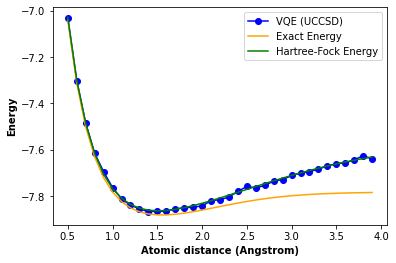

In [6]:
from qiskit.aqua.algorithms import VQE, NumPyEigensolver
import matplotlib.pyplot as plt
import numpy as np
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock
from qiskit.circuit.library import EfficientSU2
from qiskit.aqua.components.optimizers import COBYLA, SPSA, SLSQP
from qiskit.aqua.operators import Z2Symmetries
from qiskit import IBMQ, BasicAer, Aer
from qiskit.chemistry.drivers import PySCFDriver, UnitsType
from qiskit.chemistry import FermionicOperator
from qiskit import IBMQ
from qiskit.aqua import QuantumInstance
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua.components.variational_forms import RY
hf_energies = []
maptype='parity'
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
def get_qubit_op(dist):
    driver = PySCFDriver(atom="Li .0 .0 .0; H .0 .0 " + str(dist), unit=UnitsType.ANGSTROM, 
                         charge=0, spin=0, basis='sto3g')
    molecule = driver.run()
    hf = molecule.hf_energy
    hf_energies.append(hf)
    freeze_list = [0]
    remove_list = [-3, -2]
    repulsion_energy = molecule.nuclear_repulsion_energy
    num_particles = molecule.num_alpha + molecule.num_beta
    num_spin_orbitals = molecule.num_orbitals * 2
    remove_list = [x % molecule.num_orbitals for x in remove_list]
    freeze_list = [x % molecule.num_orbitals for x in freeze_list]
    remove_list = [x - len(freeze_list) for x in remove_list]
    remove_list += [x + molecule.num_orbitals - len(freeze_list)  for x in remove_list]
    freeze_list += [x + molecule.num_orbitals for x in freeze_list]
    ferOp = FermionicOperator(h1=molecule.one_body_integrals, h2=molecule.two_body_integrals)
    ferOp, energy_shift = ferOp.fermion_mode_freezing(freeze_list)
    num_spin_orbitals -= len(freeze_list)
    num_particles -= len(freeze_list)
    ferOp = ferOp.fermion_mode_elimination(remove_list)
    num_spin_orbitals -= len(remove_list)
    qubitOp = ferOp.mapping(map_type=maptype, threshold=0.00000001)
    qubitOp = Z2Symmetries.two_qubit_reduction(qubitOp, num_particles)
    shift = energy_shift + repulsion_energy
    return qubitOp, num_particles, num_spin_orbitals, shift, molecule
# backend = Aer.get_backend('statevector_simulator')

#Noise
IBMQ.save_account('bc88c99aa37b86e22812415e61a81cf6e0cecaa97ed09cda93e19d322eea4f960501f957cb05ad13c5972a7877bdf774aaa045a9b295c491ac0983f367c5cbc2')
provider = IBMQ.load_account()
backend = Aer.get_backend("qasm_simulator")
device = provider.get_backend("ibmq_vigo")
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device.properties())
quantum_instance = QuantumInstance(backend=backend, 
                                  shots=5, 
                                  noise_model=noise_model, 
                                  coupling_map=coupling_map,
                                  measurement_error_mitigation_cls=CompleteMeasFitter,
                                  cals_matrix_refresh_period=30)

distances = np.arange(0.5, 4.0, 0.1)
exact_energies = []
vqe_energies = []
optimizer = SLSQP(maxiter=10, tol=0.01)
for dist in distances:
    qubitOp, num_particles, num_spin_orbitals, shift, molecule = get_qubit_op(dist)
    result = NumPyEigensolver(qubitOp).run()
    exact_energies.append(result['energy'] + shift)
    
    initial_state = HartreeFock(
        num_spin_orbitals,
        num_particles,
        qubit_mapping=maptype
    ) 
    var_form = UCCSD(
       num_orbitals=num_spin_orbitals,
       num_particles=num_particles,
        initial_state=initial_state,
        qubit_mapping=maptype, 
        num_time_slices=1,
        reps=1
    )
    num_qubits = qubitOp.num_qubits
    #var_form = EfficientSU2(num_qubits, entanglement="full")
    vqe = VQE(qubitOp, var_form, optimizer)
    vqe_result = np.real(vqe.run(backend)['eigenvalue'] + shift)
    vqe_energies.append(vqe_result)
    
    
plt.plot(distances, vqe_energies, label="VQE (UCCSD)", marker='o', color='blue' )
plt.plot(distances, exact_energies, label="Exact Energy", color='orange')
plt.plot(distances, hf_energies, label="Hartree-Fock Energy", color='green', )

plt.xlabel('Atomic distance (Angstrom)', fontweight='bold')
plt.ylabel('Energy', fontweight='bold')
plt.legend()
plt.show()